In [1]:
from src.agent.tool import ToolAgent
from src.inference.groq import ChatGroq
from os import environ
from dotenv import load_dotenv
load_dotenv()

api_key=environ.get('GROQ_API_KEY')
llm=ChatGroq('llama-3.1-70b-versatile',api_key,temperature=0)

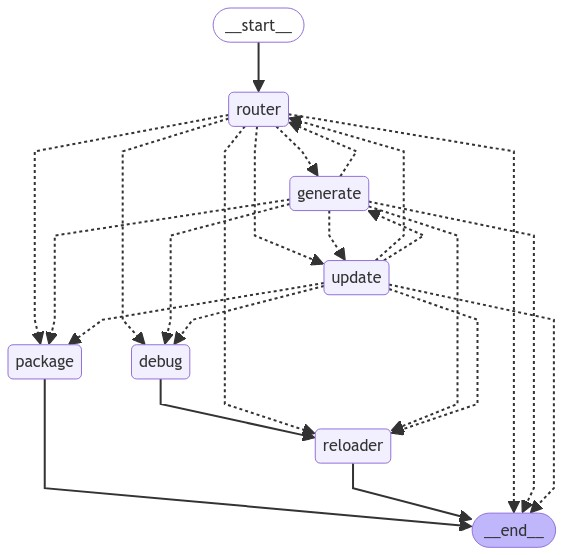

In [2]:
ToolAgent().plot_mermaid()

In [6]:
query='''
create a tool that can give the weather data. of a location.
'''

In [7]:
tool_generator=ToolGeneratorAgent('experimental.py',llm,json=True,verbose=True)
generated_tool=tool_generator.invoke(query)

Entering Generator Agent
{'id': 'chatcmpl-c2036838-ad80-40b1-8c02-807e57422ab4', 'object': 'chat.completion', 'created': 1724210668, 'model': 'llama-3.1-70b-versatile', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '{\n    "name": "Weather",\n    "tool_name": "weather_tool",\n    "tool": "class Weather(BaseModel):\\n    location:str=Field(...,description=\\"The location for which the weather data is required.\\")\\n\\n@tool(\\"Weather Tool\\",args_schema=Weather)\\ndef weather_tool(location:str):\\n    \'\'\'\\n    Returns the current weather data for the given location using OpenWeatherMap API.\\n    \'\'\'\\n    import requests\\n    import os\\n    import json\\n\\n    api_key=os.environ.get(\'OPENWEATHERMAP_API_KEY\')\\n    base_url=\\"http://api.openweathermap.org/data/2.5/weather\\"\\n    params={\\n        \'q\':location,\\n        \'appid\':api_key,\\n        \'units\':\'metric\'\\n    }\\n\\n    try:\\n        response=requests.get(base_url,params=params

In [8]:
print(generated_tool['tool'])

class Weather(BaseModel):
    location:str=Field(...,description="The location for which the weather data is required.")

@tool("Weather Tool",args_schema=Weather)
def weather_tool(location:str):
    '''
    Returns the current weather data for the given location using OpenWeatherMap API.
    '''
    import requests
    import os
    import json

    api_key=os.environ.get('OPENWEATHERMAP_API_KEY')
    base_url="http://api.openweathermap.org/data/2.5/weather"
    params={
        'q':location,
        'appid':api_key,
        'units':'metric'
    }

    try:
        response=requests.get(base_url,params=params)
        response.raise_for_status()
    except requests.exceptions.RequestException as err:
        return f"Error: {err}"

    try:
        data=response.json()
        weather_data={
            'Location':data['name'],
            'Temperature':data['main']['temp'],
            'Humidity':data['main']['humidity'],
            'Weather Condition':data['weather'][0]['descriptio